In [29]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [30]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [214]:
## Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect #added inspect

In [41]:
## create engine to hawaii.sqlite
database_path = "Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{database_path}")

In [42]:
## Reflect an existing database into a new model
Base = automap_base()
## Reflect the tables
Base.prepare(engine, reflect=True)

In [43]:
## View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [44]:
## Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [45]:
## Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [48]:
## Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
tables = inspector.get_table_names()
tables

['measurement', 'station']

In [92]:
## Use Inspector to print the column names and types
for table in tables:
    print(f"Table: {table.capitalize()}")
    columns = inspector.get_columns(table)
    for c in columns:
        print(c['name'], c["type"])
    print(".............\n")

Table: Measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
.............

Table: Station
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT
.............



In [165]:
## Find the most recent date in the data set.
## The '\' at the end connects the line below it
results_meas = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).all()
#results_meas

results_meas[0]

('2017-08-23')

In [ ]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results, 
## starting from the most recent data point in the database.

In [166]:
## Calculate the date one year from the last date in data set.
recent_date = results_meas[0]
#print(recent_date[0])

from datetime import datetime, timedelta
recent_date_datetime = datetime.strptime(recent_date[0], "%Y-%m-%d")
#type(recent_date_datetime)

## Use time delta to subtract 365 days from the datetime type varaible (recent_date_datetime)
minus_one_year = recent_date_datetime - timedelta(days = 365)

## Convert minus_one_year to a string
minus_one_year_str = datetime.strftime(minus_one_year,"%Y-%m-%d")
#minus_one_year

In [234]:
## Perform a query to retrieve the data and precipitation scores
data_meas = session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date >= minus_one_year_str).all()
#data

In [170]:
## Save the query results as a Pandas DataFrame and set the index to the date column
df_prcp = pd.DataFrame(data_meas, columns = ["Precipitation", "Date"])
df_prcp_date_index = df_prcp.set_index("Date")

In [171]:
## Sort the dataframe by date
df_prcp_date_index = df_prcp_date_index.sort_index()
df_prcp_date_index.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


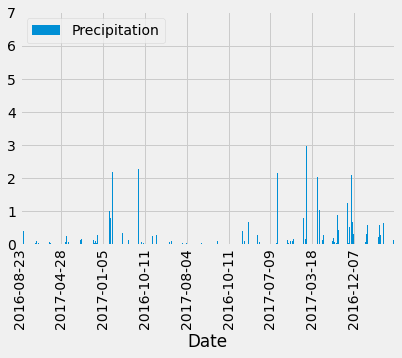

In [161]:
## Use Pandas Plotting with Matplotlib to plot the data
ax = df_prcp_date_index.plot.bar(x = "Date", y = "Precipitation")
plt.locator_params(axis='x', nbins=9)

In [221]:
## Use Pandas to calculate the summary statistics for the precipitation data
mean_prcp = df_prcp_date_index.mean()

median_prcp = df_prcp_date_index.median()

var_prcp = df_prcp_date_index.var()

std_prcp = df_prcp_date_index.std()

sem_prcp = df_prcp_date_index.sem()

sum_stats = pd.DataFrame({"Mean": mean_prcp, 
                          "Median": median_prcp,
                          "Variance": var_prcp,
                          "Std": std_prcp,
                          "SEM": sem_prcp
                         })

sum_stats

,Mean,Median,Variance,Std,SEM
Precipitation,0.177279,0.02,0.212696,0.46119,0.010259


# Exploratory Station Analysis

In [223]:
# Design a query to calculate the total number stations in the dataset
results_sta_tot = session.query(Station.id).count()
results_sta_tot

9

In [228]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
#List the stations and the counts in descending order.

# session.query(func.count(User.id)).\
#         group_by(User.name)

sta_count = func.count(Measurement.station)

results_sta_count = session.query(Measurement.station, sta_count).\
    group_by(Measurement.station).\
    order_by(sta_count.desc()).all()

results_sta_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [237]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = results_sta_count[0]
most_active

('USC00519281', 2772)

In [238]:
calc = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs).\
             filter(Measurement.station == most_active[0])).all()
calc

[(53.0, 87.0, 71.66378066378067)]

In [254]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

data_most_active = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).\
    filter(Measurement.station == most_active[0]).all()
data_most_active

[('2017-08-18'),
 ('2017-08-17'),
 ('2017-08-16'),
 ('2017-08-15'),
 ('2017-08-14'),
 ('2017-08-13'),
 ('2017-08-06'),
 ('2017-08-05'),
 ('2017-08-04'),
 ('2017-07-31'),
 ('2017-07-30'),
 ('2017-07-29'),
 ('2017-07-28'),
 ('2017-07-27'),
 ('2017-07-26'),
 ('2017-07-25'),
 ('2017-07-24'),
 ('2017-07-23'),
 ('2017-07-22'),
 ('2017-07-21'),
 ('2017-07-20'),
 ('2017-07-19'),
 ('2017-07-18'),
 ('2017-07-17'),
 ('2017-07-16'),
 ('2017-07-15'),
 ('2017-07-14'),
 ('2017-07-13'),
 ('2017-07-12'),
 ('2017-07-11'),
 ('2017-07-10'),
 ('2017-07-09'),
 ('2017-07-08'),
 ('2017-07-07'),
 ('2017-07-06'),
 ('2017-07-05'),
 ('2017-07-04'),
 ('2017-07-03'),
 ('2017-07-02'),
 ('2017-07-01'),
 ('2017-06-30'),
 ('2017-06-29'),
 ('2017-06-28'),
 ('2017-06-27'),
 ('2017-06-26'),
 ('2017-06-25'),
 ('2017-06-24'),
 ('2017-06-23'),
 ('2017-06-22'),
 ('2017-06-21'),
 ('2017-06-20'),
 ('2017-06-19'),
 ('2017-06-18'),
 ('2017-06-17'),
 ('2017-06-16'),
 ('2017-06-15'),
 ('2017-06-14'),
 ('2017-06-13'),
 ('2017-06-12'

In [263]:
# Preview recent date
data_most_active[0]

('2017-08-18')

In [271]:
recent_date_dt = datetime.strptime(recent_dt[0], "%Y-%m-%d")

## Use time delta to subtract 365 days from the datetime type varaible (recent_date_datetime)
minus_one_yr = recent_date_dt - timedelta(days = 365)

## Convert minus_one_year to a string
minus_one_yr_str = datetime.strftime(minus_one_year,"%Y-%m-%d")
minus_one_yr_str

'2016-08-18'

In [280]:
## This counts the number of times a temperature value was in the data

tobs_count = func.count(Measurement.tobs)

temps_count = session.query(tobs_count).\
    filter(Measurement.date >= minus_one_yr_str).\
    group_by(Measurement.tobs).all()
    
temps_count

[(1),
 (3),
 (6),
 (4),
 (13),
 (15),
 (23),
 (28),
 (31),
 (54),
 (56),
 (92),
 (110),
 (121),
 (126),
 (119),
 (175),
 (171),
 (214),
 (215),
 (200),
 (165),
 (162),
 (94),
 (42),
 (12),
 (6),
 (1),
 (2)]

In [282]:
temps1 = session.query(Measurement.tobs).\
            filter(Measurement.date >= minus_one_yr_str).all()
temps1

[(80.0),
 (77.0),
 (80.0),
 (76.0),
 (77.0),
 (81.0),
 (79.0),
 (80.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (79.0),
 (80.0),
 (81.0),
 (80.0),
 (79.0),
 (75.0),
 (79.0),
 (76.0),
 (76.0),
 (80.0),
 (79.0),
 (78.0),
 (76.0),
 (78.0),
 (78.0),
 (75.0),
 (79.0),
 (80.0),
 (79.0),
 (81.0),
 (77.0),
 (77.0),
 (78.0),
 (76.0),
 (82.0),
 (81.0),
 (78.0),
 (80.0),
 (80.0),
 (79.0),
 (80.0),
 (80.0),
 (80.0),
 (79.0),
 (79.0),
 (79.0),
 (80.0),
 (80.0),
 (79.0),
 (78.0),
 (76.0),
 (75.0),
 (80.0),
 (80.0),
 (79.0),
 (80.0),
 (79.0),
 (78.0),
 (78.0),
 (80.0),
 (81.0),
 (79.0),
 (77.0),
 (79.0),
 (78.0),
 (77.0),
 (77.0),
 (78.0),
 (77.0),
 (78.0),
 (77.0),
 (76.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (76.0),
 (75.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (72.0),
 (71.0),
 (72.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (75.0),
 (76.0),
 (76.0),
 (75.0),
 (72.0),
 (74.0),
 (75.0),
 (73.0),
 (76.0),
 (75.0),
 (68.0),
 (75.0),
 (75.0),
 (72.0),
 (69.0),
 (71.0),
 (68.0),
 (67.0),
 

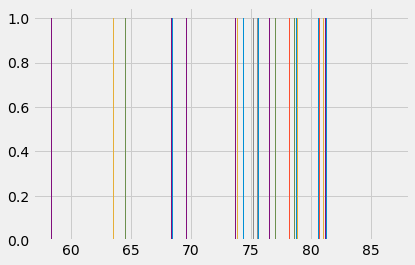

In [283]:
plt.hist(temps1, bins = 12)
plt.show()

# Close session

In [284]:
# Close Session
session.close()